In [1]:
%matplotlib inline

In [2]:
import fastai.vision as vs
from fastai.metrics import error_rate

In [3]:
# create data path
path = vs.untar_data(vs.URLs.CIFAR_100)
print(path
     )

/home/jupyter/.fastai/data/cifar100


In [4]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/cifar100/models'),
 PosixPath('/home/jupyter/.fastai/data/cifar100/test'),
 PosixPath('/home/jupyter/.fastai/data/cifar100/train')]

In [5]:
#valid_pct stands for % of train data that will act as validation set
data = vs.ImageDataBunch.from_folder(path,bs=64,test='test',valid_pct=0.20,size=224,seed=1,ds_tfms=vs.get_transforms()).normalize(vs.imagenet_stats)

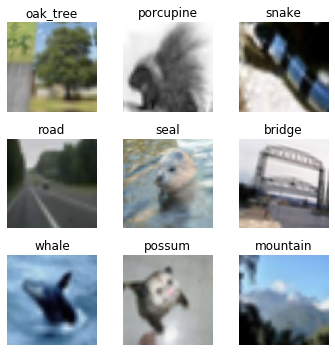

In [6]:
data.show_batch(rows=3,figsize=(5,5))

In [ ]:
img_sample=vs.open_image(path/'train/fish/shark/mackerel_shark_s_000999.png')

img_sample.shape


img=img_sample
img.data, img.shape, img.size


In [7]:
data

ImageDataBunch;

Train: LabelList (40000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
aquarium_fish,aquarium_fish,aquarium_fish,aquarium_fish,aquarium_fish
Path: /home/jupyter/.fastai/data/cifar100;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
castle,cattle,bear,bee,lawn_mower
Path: /home/jupyter/.fastai/data/cifar100;

Test: LabelList (10000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /home/jupyter/.fastai/data/cifar100

In [8]:
data.classes

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

In [8]:
learn_object = vs.cnn_learner(data,base_arch=vs.models.resnet50,metrics=error_rate)

In [ ]:
learn_object.model

In [10]:
# on validation of 20%/
learn_object.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,2.059914,1.303572,0.372100,03:00
1,1.420402,0.985421,0.289800,02:45
2,1.121383,0.803857,0.241000,02:45
3,0.954020,0.742935,0.228200,02:45
4,0.826299,0.676401,0.203200,02:45
5,0.745629,0.629419,0.185900,02:45
6,0.665313,0.612013,0.183600,02:45
7,0.600654,0.605098,0.180100,02:45


In [11]:
learn_object.save('cif100_res50')

In [12]:
learn_object.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


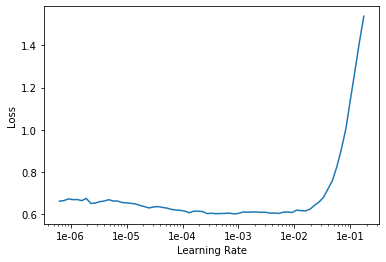

In [13]:
learn_object.recorder.plot()

In [14]:
learn_object.unfreeze()

learn_object.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.438523,1.453504,0.409800,03:40
1,1.283837,1.056646,0.310600,04:45
2,0.787988,0.668672,0.198800,03:49
3,0.447225,0.567119,0.172100,03:40


In [15]:
learn_object_ = vs.cnn_learner(data,base_arch=vs.models.resnet34,metrics=error_rate)

In [16]:
learn_object.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.494996,0.696200,0.202400,04:09
1,0.934248,0.962698,0.276000,04:27
2,0.929738,0.928285,0.263200,03:40
3,0.769659,0.850729,0.249800,03:40
4,0.566079,0.741524,0.213900,03:40
5,0.357264,0.632090,0.178000,03:40
6,0.212535,0.593699,0.163200,03:40
7,0.139919,0.581811,0.159500,03:40


In [17]:
learn_object.save('cif100_res34')

In [18]:
learn_object.unfreeze()

learn_object.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.583218,0.900203,0.242500,03:40
1,0.591163,0.789706,0.221200,03:40
2,0.315824,0.650740,0.178800,03:40
3,0.156356,0.602483,0.166900,03:40


In [19]:
learn_object.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


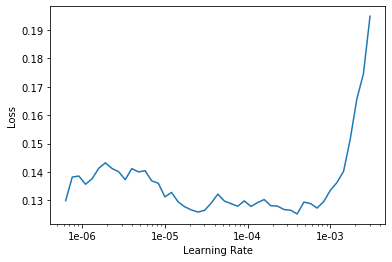

In [20]:
learn_object.recorder.plot()

In [21]:
learn_object.unfreeze()
learn_object.fit_one_cycle(8,max_lr=slice(1e-06,1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.130097,0.608091,0.164100,03:40
1,0.129787,0.643611,0.161900,03:40
2,0.110853,0.680443,0.164000,03:40
3,0.091158,0.696629,0.165400,03:40
4,0.085055,0.723634,0.165300,03:40
5,0.063883,0.722025,0.159600,03:40
6,0.050723,0.721311,0.156100,03:40
7,0.047110,0.719968,0.157400,03:40


In [22]:
interpreter = vs.ClassificationInterpretation.from_learner(learn_object)

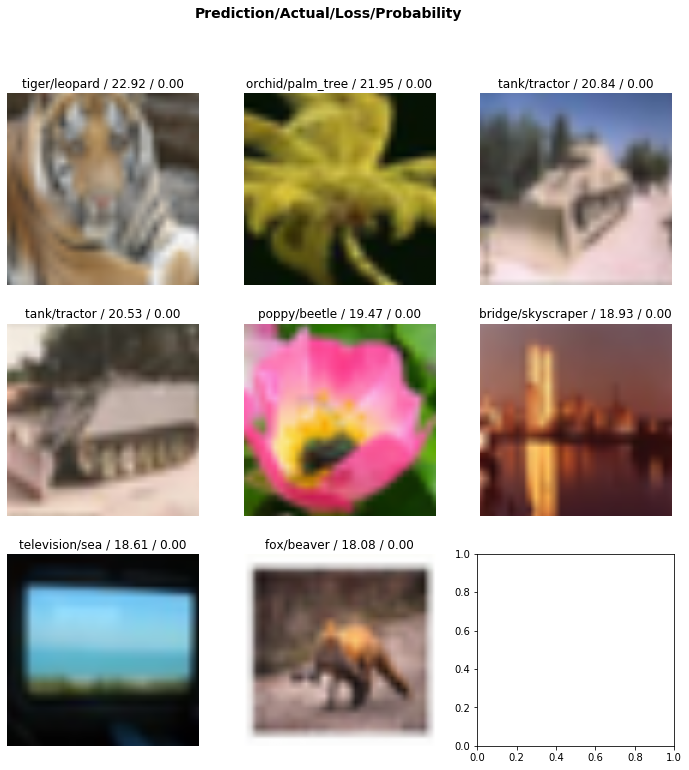

In [23]:
interpreter.plot_top_losses(8)

In [24]:
interpreter.most_confused(5)

[('bowl', 'plate', 9),
 ('tulip', 'rose', 8),
 ('crab', 'lobster', 7),
 ('bus', 'streetcar', 6),
 ('forest', 'willow_tree', 6),
 ('woman', 'girl', 6),
 ('can', 'bottle', 5),
 ('dolphin', 'whale', 5),
 ('otter', 'seal', 5),
 ('sweet_pepper', 'orange', 5)]

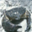

In [40]:
learn_object.data.train_ds[5000][0]

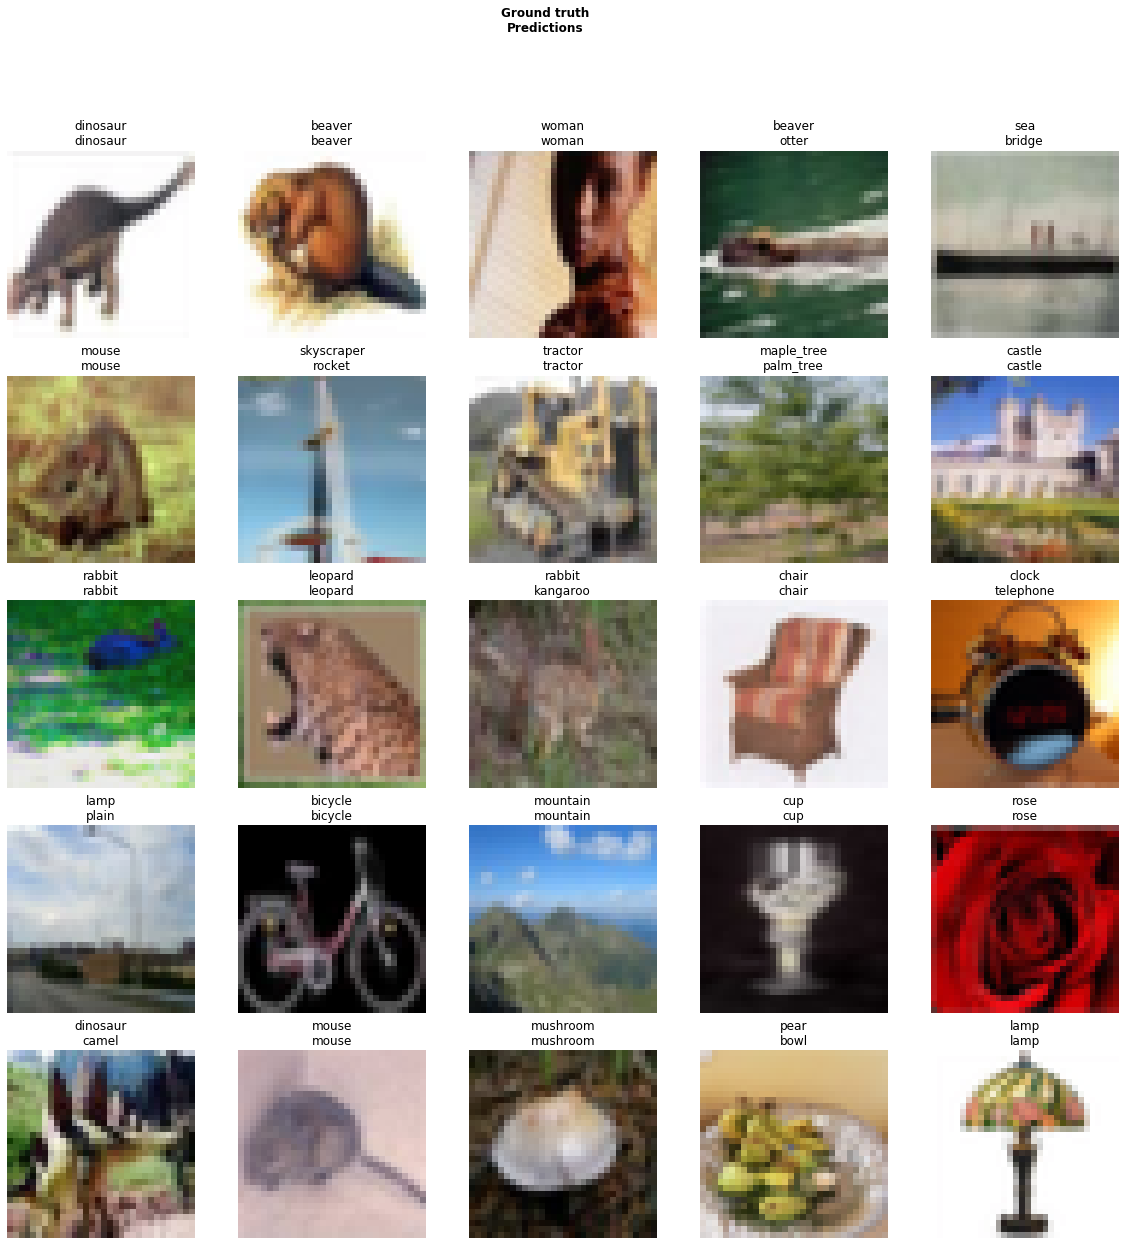

In [41]:
learn_object.show_results()

In [42]:
pwd

'/home/jupyter/tutorials/fastai/course-v3/nbs/fast_AI'